In [17]:
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [18]:
import pymongo
import pandas as pd
client = pymongo.MongoClient()
db = client["house"]
cursor = db.house.find()
df = pd.DataFrame(list(cursor))
df = df.drop_duplicates(["title", "price",
                    "xiaoqu_name", "size",
                    "buildyear", "huxing",
                    "chaoxiang", "zhuangxiu",
                    "cenggao", "district_name",
                    "sub_district_name"])

In [19]:
df.head(3)

,_id,title,price,up_price,xiaoqu_name,size,buildyear,huxing,chaoxiang,zhuangxiu,cenggao,louxing,district_name,sub_district_name
0,5dd0bcbd8982866213aab2ef,大华电梯两房/房型正气/开门南北通/房东诚意出售,690.0,76531.0,大华锦绣华城(十六街区)(公寓),90.16,2010,2室2厅,南,简装,中楼层(共18层),板楼,浦东,北蔡
1,5dd0bcbd8982866213aab2f0,非底楼 满五年唯一 税费少 婚房装修 楼称佳 户型方正,330.0,52290.0,芳雅苑,63.11,1995,2室1厅,南,精装,低楼层(共6层),板楼,浦东,北蔡
2,5dd0bcbd8982866213aab2f1,满五唯一+7号线锦绣路+复式房+带阁楼+小区央位+精装,500.0,62878.0,锦博苑,79.52,2007,2室2厅,南,精装,高楼层(共6层),板楼,浦东,北蔡


In [20]:
import numpy as np
df_avg = df.groupby("district_name")["up_price"].agg({"avg_price": "mean"}).sort_values(by="avg_price")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [21]:
df_avg["district_name"] = ["jinshan", "fengxian", "jiading", "songjiang", "qingpu",
                 "baoshan", "minhang", "pudong", "putuo", "yangpu", "hongkou", "changing",
                           "jingan", "xuhui", "huangpu"]

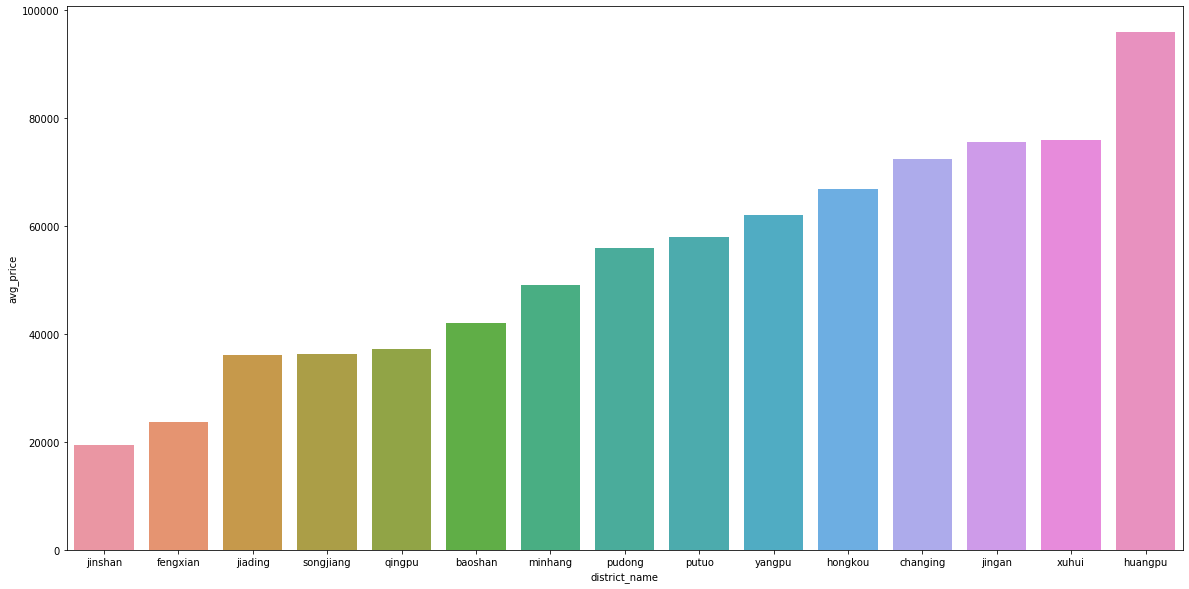

In [22]:
sns.barplot(x="district_name", y="avg_price", data=df_avg)

In [24]:
df_district = df.groupby("district_name")["price"].agg({"house_num": "count"}).sort_values(by="house_num")
df_district["district_name"] = ["jinshan", "qingpu", "fengxian", "huangpu", "hongkou",
                               "changning", "jiading", "jingan", "xuhui", "putuo", "songjiang",
                               "baoshan", "yangpu", "minhang", "pudong"]
df_district.set_index("district_name", inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


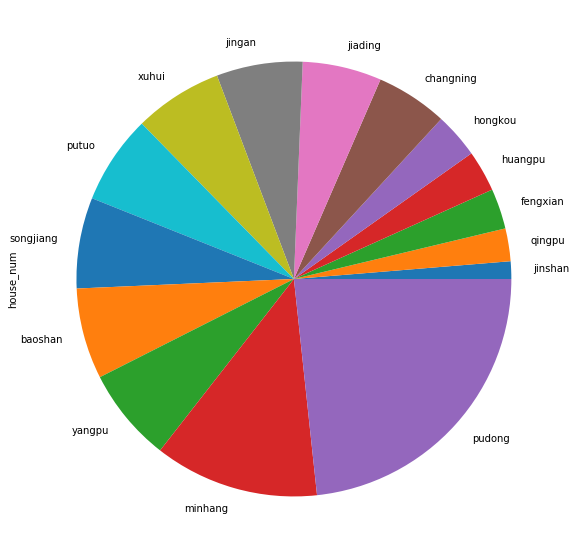

In [25]:
df_district.plot.pie(y="house_num", legend=False)

In [27]:
df_zhuangxiu = df[df.zhuangxiu!=""].groupby("zhuangxiu")["price"].agg({"house_num": "count"}).sort_values(by="house_num")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [28]:
df_zhuangxiu

,house_num
zhuangxiu,
毛坯,5317
其他,5515
简装,22667
精装,32270


In [29]:
df_zhuangxiu["zhuangxiu"] = ["maopei", "qita", "jianzhuang", "jingzhuang"]
df_zhuangxiu.set_index("zhuangxiu", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


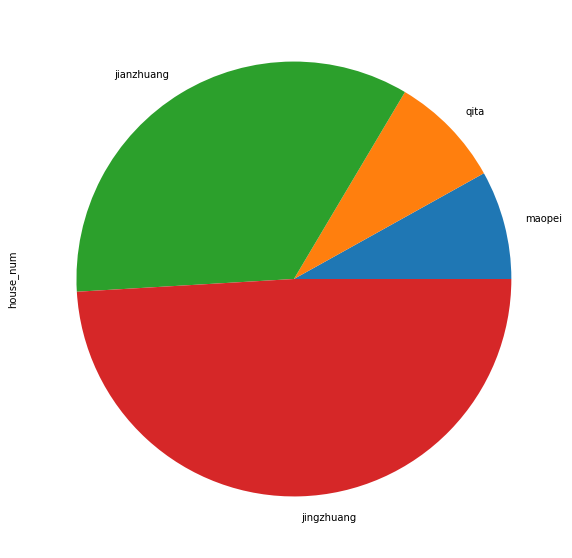

In [30]:
df_zhuangxiu[df_zhuangxiu!=""].plot.pie(y="house_num", legend=False)

In [32]:
df_buildyear = df[df.buildyear>0].groupby("buildyear")["buildyear"].agg({"house_num": "count"}).sort_values(by="buildyear")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


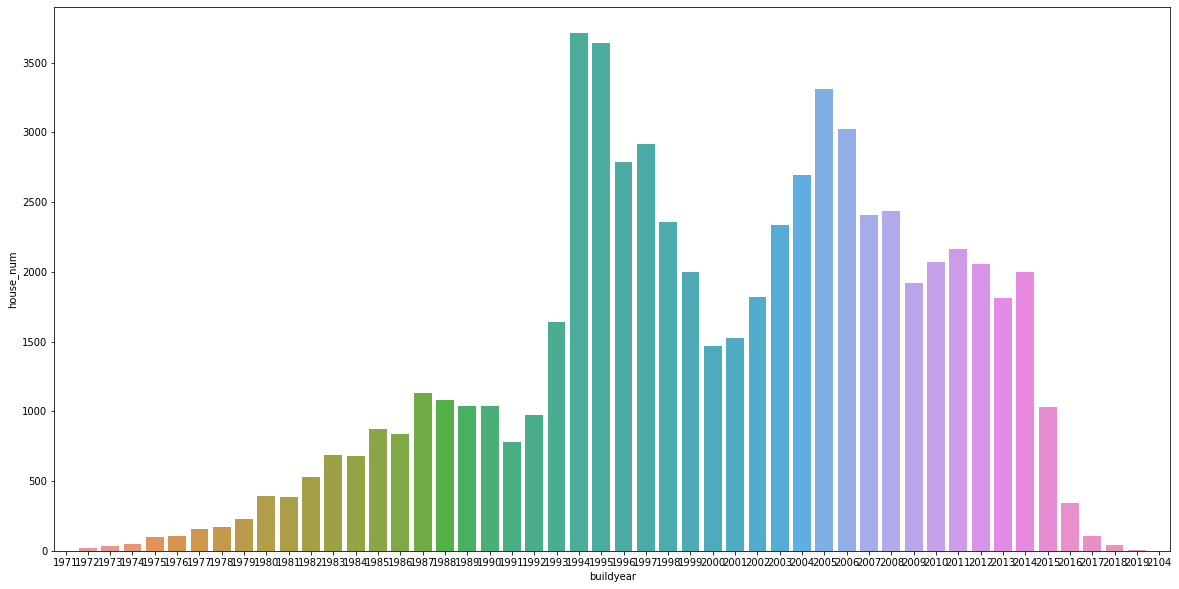

In [33]:
df_buildyear = df_buildyear[df_buildyear.index>1970]
sns.barplot(x=df_buildyear.index, y="house_num", data=df_buildyear)

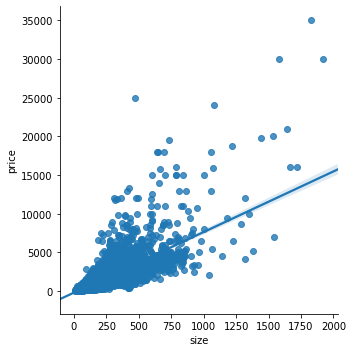

In [34]:
sns.lmplot(x="size", y="price", data=df)

In [35]:
df_xiaoqu = df.groupby("xiaoqu_name")["price"].agg({"house_num": "count"}).sort_values(by="house_num")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [36]:
df2 = df[df.xiaoqu_name=="上海康城 "]

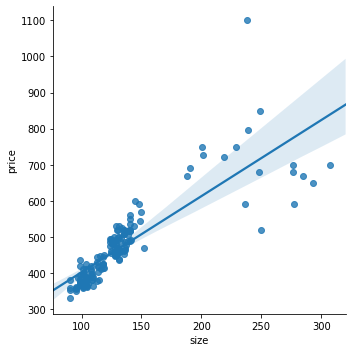

In [37]:
sns.lmplot(x="size", y="price", data=df2)